<a href="https://colab.research.google.com/github/AshtamiBiju/Infosys_springboard_internship/blob/main/Notebooks/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install transformers sentencepiece sentence-transformers scikit-learn matplotlib pandas --quiet
print("✅ Libraries installed.")

import matplotlib.pyplot as plt
from collections import Counter
import textwrap
import re
import requests
import ssl
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Handle SSL for file downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("✅ Libraries imported.")

✅ Libraries installed.
✅ Libraries imported.


In [5]:
#  Models
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')

print("✅ Summarization models loaded: T5, BART, PEGASUS.")

pegasus_para_tokenizer = PegasusTokenizer.from_pretrained('tuner007/pegasus_paraphrase')
pegasus_para_model = PegasusForConditionalGeneration.from_pretrained('tuner007/pegasus_paraphrase')
paraphrase_t5_tokenizer = T5Tokenizer.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_t5_model = T5ForConditionalGeneration.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_bart_tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
paraphrase_bart_model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')

print("✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.")

similarity_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Similarity model loaded.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

✅ Summarization models loaded: T5, BART, PEGASUS.


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Similarity model loaded.


In [6]:
#File URLs
file_urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",    # Alice in Wonderland
    "https://www.gutenberg.org/files/98/98-0.txt"     # A Tale of Two Cities
]

# Load texts
def load_text_file(url):
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        text = response.text
        start_idx = max([text.find(marker) for marker in ["*** START OF", "CHAPTER"]] + [0])
        end_idx = text.find("*** END OF")
        if start_idx > 0 and end_idx > 0:
            text = text[start_idx:end_idx]
        if len(text) < 100:
            raise ValueError("Text is too short.")
        print(f"✅ Successfully loaded text from {url} ({len(text)} characters)")
        return text.strip(), "Text file"

    except Exception as e:
        print(f"Error loading text from {url}: {e}")
        fallback = "Natural Language Processing enables computers to understand human language."
        return fallback, "Fallback text"

def validate_text(text):
    if not isinstance(text, str) or len(text.strip()) < 50:
        raise ValueError("Invalid text: must be a string with at least 50 characters.")
    return text

def load_multiple_text_files(urls):
    if len(urls) != 2:
        raise ValueError("Exactly two URLs must be provided.")
    texts = {}
    for i, url in enumerate(urls, 1):
        text, source = load_text_file(url)
        text = validate_text(text)
        texts[f"Text {i}"] = {'text': text[:50000], 'source': source}  # limit size
    return texts

loaded_texts = load_multiple_text_files(file_urls)
for key, data in loaded_texts.items():
    print(f"{key} ({data['source']}): {len(data['text']):,} characters")
    print(f"Preview: {data['text'][:150]}...")


✅ Successfully loaded text from https://www.gutenberg.org/files/11/11-0.txt (144483 characters)
✅ Successfully loaded text from https://www.gutenberg.org/files/98/98-0.txt (773369 characters)
Text 1 (Text file): 50,000 characters
Preview: CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends i...
Text 2 (Text file): 50,000 characters
Preview: CHAPTER I      The Period
     CHAPTER II     The Mail
     CHAPTER III    The Night Shadows
     CHAPTER IV     The Preparation
     CHAPTER V   ...


In [ ]:
#T5 Summarization
def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

In [ ]:
#Bart Summarization
def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
#Pegasus Summarization
def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

In [ ]:
#Pegasus Paraphrasing
def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

In [ ]:
#T5 paraphrasing
def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

In [ ]:
#BART Paraphrasing
def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

In [ ]:
#Similarity Analysis
def compute_similarity(text1, text2):
    """Compute cosine similarity between texts."""
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

#Enhanced Model Comparison
def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

#Similarity to Original
def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

In [ ]:
#Enhanced Summarization Comparison
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

In [ ]:
#Enhanced Paraphrasing Comparison
def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

In [ ]:
#Integrated TextMorph Pipeline
#Pipeline Initialization
class TextMorphPipeline:
    """Streamlined TextMorph pipeline for text files, no preprocessing or NLP."""

    def __init__(self):
        self.reference_texts = []

    def add_reference(self, text):
        """Add reference text for similarity."""
        self.reference_texts.append(text)

#Pipeline Summarization
def pipeline_summarize(self, input_text, summarizer='t5'):
    """Summarization step in pipeline."""
    if summarizer == 't5':
        summary = generate_t5_summary(input_text)
    elif summarizer == 'bart':
        summary = generate_bart_summary(input_text)
    elif summarizer == 'pegasus':
        summary = generate_pegasus_summary(input_text)
    else:
        raise ValueError("Invalid summarizer. Choose 't5', 'bart', or 'pegasus'.")
    return summary, summarizer

#Pipeline Paraphrasing
def pipeline_paraphrase(self, input_text, paraphrase_sentences=2):
    """Paraphrasing step with comparison."""
    # Simple sentence splitting without NLTK
    sentences = re.split(r'[.!?]+', input_text)[:paraphrase_sentences]
    sentences = [s.strip() for s in sentences if s.strip()]
    paraphrases = {}
    for i, sent in enumerate(sentences):
        key = f'Sentence {i+1}'
        metrics = compare_paraphrasers_enhanced(sent)
        paraphrases[key] = {'original': sent[:100] + "...", 'metrics': metrics}
    return paraphrases

#Pipeline Similarity Step
def pipeline_similarity(self, input_text, top_k_similar=2):
    """Similarity step in pipeline."""
    if self.reference_texts:
        similarities = [(i+1, compute_similarity(input_text[:2000], ref)) for i, ref in enumerate(self.reference_texts)]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k_similar]
    return []


In [ ]:
#Full Pipeline Process
def process(self, input_text, summarizer='t5', paraphrase_sentences=2, top_k_similar=2):
    """Run the full pipeline."""
    results = {}

    summary, used_summarizer = pipeline_summarize(self, input_text, summarizer)
    results['summary'] = summary
    results['summarizer_used'] = used_summarizer

    results['paraphrases'] = pipeline_paraphrase(self, input_text, paraphrase_sentences)

    results['similarities'] = pipeline_similarity(self, input_text, top_k_similar)

    return results

# Bind methods to class
TextMorphPipeline.pipeline_summarize = pipeline_summarize
TextMorphPipeline.pipeline_paraphrase = pipeline_paraphrase
TextMorphPipeline.pipeline_similarity = pipeline_similarity
TextMorphPipeline.process = process

# Initialize
pipeline = TextMorphPipeline()

In [ ]:
#Testing with Text Files
#Add Reference Texts
pipeline.add_reference("Natural Language Processing powers modern AI applications.")
pipeline.add_reference("Machine learning enhances text analysis capabilities.")
print("✅ Reference texts added.")

✅ Reference texts added.


In [ ]:
#Process First Text(T5)
first_text = loaded_texts['Text 1']['text']
results_t5_first = pipeline.process(first_text, summarizer='t5')
print("----------- T5 on First Text (Frankenstein) -----------")
print(f"Summary: {textwrap.fill(results_t5_first['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.916):
  1. Chapter I.
  2. Chapter I
  3. Chapter I begins.

T5-Paraphrase Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.551):
  1. CHAPTER I
  2. CHAPITRE I
  3. CHAPTTER I

BART-Paraphrase Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.913):
  1. CHAPTER I
  2. CHAPTER 1
  3. CHAPTER _ I

Average Similarity PEGASUS vs T5-Paraphrase: 0.507
Average Similarity PEGASUS vs BART-Paraphrase: 0.836
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.499


/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 7.0, Avg Sim to Original: 0.883):
  1. Chapter 2 of Down the Rabbit-Hole.
  2. Chapter 2 is called Down the Rabbit-Hole.
  3. The second chapter is called Down the Rabbit-Hole.

T5-Paraphrase Paraphrases (Avg Length: 4.7, Avg Sim to Original: 0.990):
  1. Down the Rabbit-Hole CHAPTER II
  2. Down Rabbit-Hole CHAPTER II
  3. Down the rabbit-hole CHAPTER II

BART-Paraphrase Paraphrases (Avg Length: 5.7, Avg Sim to Original: 0.986):
  1. Down the rabbit hole CHAPTER II
  2. Down the rabbit hole chapter II
  3. Down the rabbit-hole CHAPTER II

Average Similarity PEGASUS vs T5-Paraphrase: 0.873
Average Similarity PEGASUS vs BART-Paraphrase: 0.879
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.978
----------- T5 on First Text (Frankenstein) -----------
Summary: the rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down . "I
wonder how many miles I’ve fallen by thi

In [ ]:
#Process Second Text (PEGASUS)
second_text = loaded_texts['Text 2']['text']
results_pegasus_second = pipeline.process(second_text, summarizer='pegasus')
print("----------- PEGASUS on Second Text (Pride and Prejudice) -----------")
print(f"Summary: {textwrap.fill(results_pegasus_second['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 24.3, Avg Sim to Original: 0.713):
  1. CHAPTER I The Period, CHAPTER II The Mail, CHAPTER III The Night Shadows, CHAPTER IV The Golden Thread, and CHAPTER VI The Wine-shop.
  2. CHAPTER I The Period, CHAPTER II The Mail, CHAPTER III The Night Shadows, CHAPTER IV The Golden Thread, CHAPTER VI The Wine-shop, and a Disappointment.
  3. CHAPTER I The Period, CHAPTER II The Mail, CHAPTER III The Night Shadows, CHAPTER IV The Golden Thread, and CHAPTER VI The Wine-shop are included.

T5-Paraphrase Paraphrases (Avg Length: 37.0, Avg Sim to Original: 0.793):
  1. CHAPTER I The Period CHAPTER II The Mail CHAPTER III The Night Shadows CHAPTER IV The Preparation CHAPTER V The Wine Shop CHAPTER VI The Shoemaker Book the Second Golden Thread CHAPTER I Five Years Later CHAPTER II
  2. CHAPTER I The Period CHAPTER II The Mail CHAPTER III The Night Shadows CHAPTER IV The Preparation CHAPTER V The Wine-shop CHAPT

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 24.3, Avg Sim to Original: 0.766):
  1. It was the best of times, it was the worst of times, it was the age of foolishness, and it was the season of Light.
  2. It was the best of times, the worst of times, the age of wisdom, the age of foolishness, and the season of Light.
  3. It was the best of times, it was the worst of times, it was the age of foolishness, and it was the season of light.

T5-Paraphrase Paraphrases (Avg Length: 44.7, Avg Sim to Original: 0.869):
  1. The period It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of
  2. The Period It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of
  3. The period It was 

In [ ]:
#Enhanced Comparison on Both Texts
print("----------- Enhanced Summarization Comparison on First Text -----------")
comparison_first = compare_summarizers_enhanced(first_text)
print("----------- Enhanced Summarization Comparison on Second Text -----------")
comparison_second = compare_summarizers_enhanced(second_text)

----------- Enhanced Summarization Comparison on First Text -----------
----------- Enhanced Summarization Comparison -----------
T5 Summary (Length: 39, Sim to Original: 0.579):
the rabbit-hole went straight on like a tunnel for so long . the rabbit snatched a watch out of its
waistcoat-pocket and hurried on . it was a pity that the rabbit didn't know what it was doing .

BART Summary (Length: 76, Sim to Original: 0.700):
CHAPTER I.    … Down the Rabbit-Hole� CHAPTER II. Â  The Pool of Tears� CHAMPION CHAPTER III. I  A
Caucus-Race and a Long Tale of the Rabbit’s Story▬ CHAPTER IV. ,  The Rabbit Sends in a Little
Billing-Basket, CHAPTER V.  �   Advice from a Caterpillar on the Road to the White Rabbit's
House,CHAPTER VI,   Pig and Pepper Channels CHAPTER VII.  … A Mad Tea-Party, ChannelsCHAPTER VIII.
The Queen and Her Croquet-Ground ChannelsChannelsCHAT CHAPTER IX.  !  The Mock

PEGASUS Summary (Length: 34, Sim to Original: 0.385):
Alice's Adventures in Wonderland is published by Littl

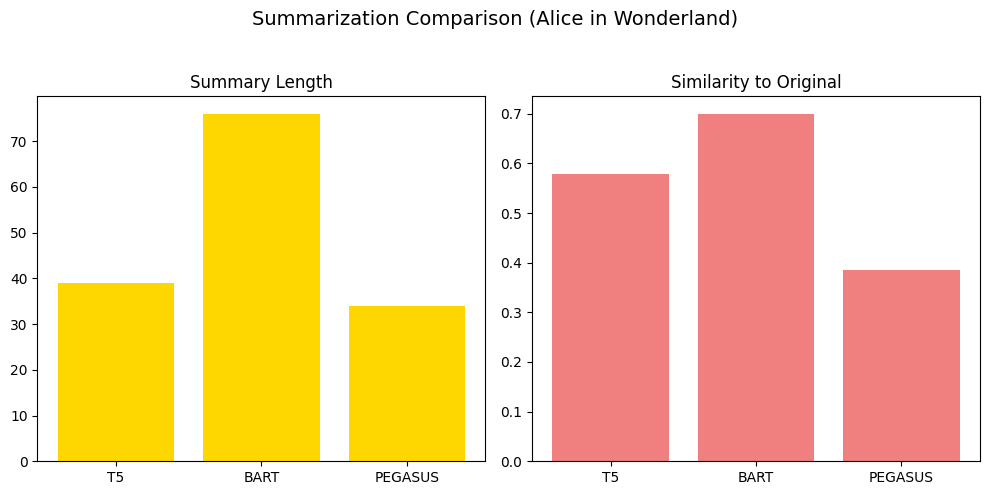

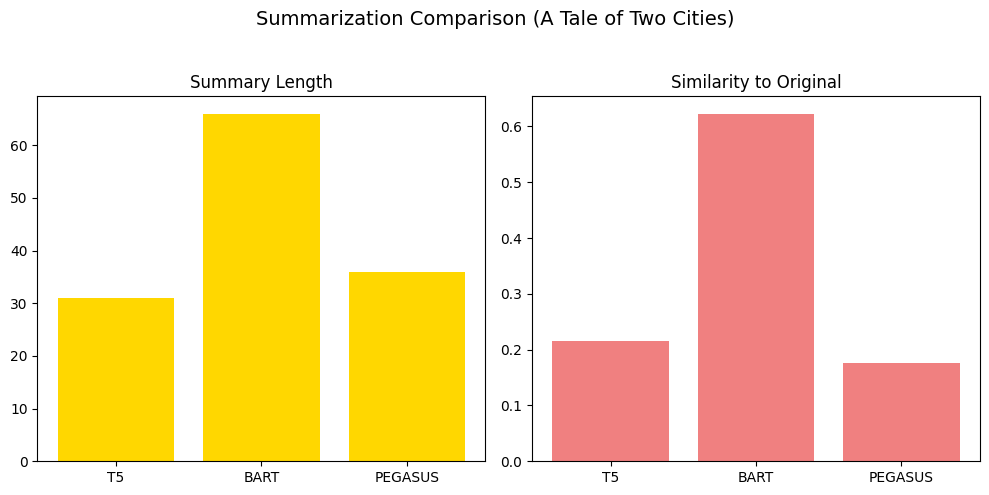

In [ ]:
#Visualization & Insights
#Visualize T5 vs BART vs PEGASUS Summarization metrics
def plot_enhanced_summarization_comparison(metrics, title="Summarization Comparison"):
    """Plot enhanced metrics for summarization models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Length
    ax1.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['length'], metrics['bart']['length'], metrics['pegasus']['length']],
            color='gold')
    ax1.set_title('Summary Length')

    # Similarity to Original
    ax2.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['sim_to_original'],
             metrics['bart']['sim_to_original'],
             metrics['pegasus']['sim_to_original']],
            color='lightcoral')
    ax2.set_title('Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_enhanced_summarization_comparison(comparison_first, title="Summarization Comparison (Alice in Wonderland)")
plot_enhanced_summarization_comparison(comparison_second, title="Summarization Comparison (A Tale of Two Cities)")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.916):
  1. Chapter I.
  2. Chapter I
  3. Chapter I begins.

T5-Paraphrase Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.551):
  1. CHAPTER I
  2. CHAPITRE I
  3. CHAPTTER I

BART-Paraphrase Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.913):
  1. CHAPTER I
  2. CHAPTER 1
  3. CHAPTER _ I

Average Similarity PEGASUS vs T5-Paraphrase: 0.507
Average Similarity PEGASUS vs BART-Paraphrase: 0.836
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.499


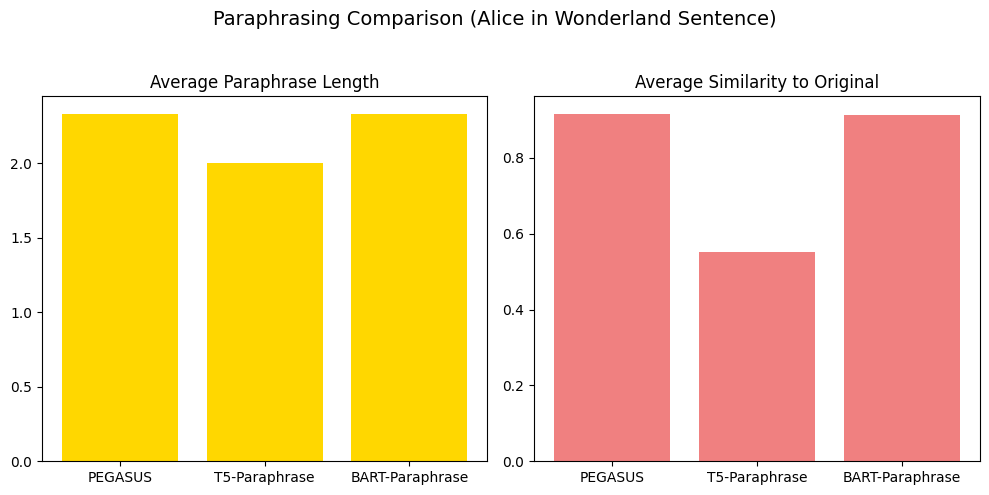

In [ ]:
#Visualize PEGASUS vs T5-Paraphrase vs BART-Paraphrase metrics
def plot_enhanced_paraphrasing_comparison(metrics, title="Paraphrasing Comparison"):
    """Plot enhanced metrics for paraphrasing models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Average Length
    ax1.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_length'],
             metrics['t5_paraphrase']['avg_length'],
             metrics['bart_paraphrase']['avg_length']],
            color='gold')
    ax1.set_title('Average Paraphrase Length')

    # Average Similarity to Original
    ax2.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_sim_to_original'],
             metrics['t5_paraphrase']['avg_sim_to_original'],
             metrics['bart_paraphrase']['avg_sim_to_original']],
            color='lightcoral')
    ax2.set_title('Average Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot paraphrasing comparison for first sentence of first text
first_sentence = re.split(r'[.!?]+', first_text)[0].strip()
plot_enhanced_paraphrasing_comparison(compare_paraphrasers_enhanced(first_sentence),
                                     title="Paraphrasing Comparison (Alice in Wonderland Sentence)")

In [ ]:
#Bigram Analysis
def analyze_bigrams(text):
    """Compute top bigrams using string splitting."""
    text = clean_text(text[:2000])  # Clean and limit for performance
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(5)
    return [(f"{w1} {w2}", count) for (w1, w2), count in bigram_freq]

print("\nBigram Analysis")
for key, data in loaded_texts.items():
    print(f"\n{key}:")
    bigrams = analyze_bigrams(data['text'])
    print(f"Top Bigrams: {bigrams}")


Bigram Analysis

Text 1:
Top Bigrams: [('it, and', 4), ('out of', 3), ('CHAPTER I.', 2), ('I. Down', 2), ('Down the', 2)]

Text 2:
Top Bigrams: [('was the', 7), ('it was', 6), ('CHAPTER I', 3), ('CHAPTER II', 3), ('CHAPTER III', 3)]


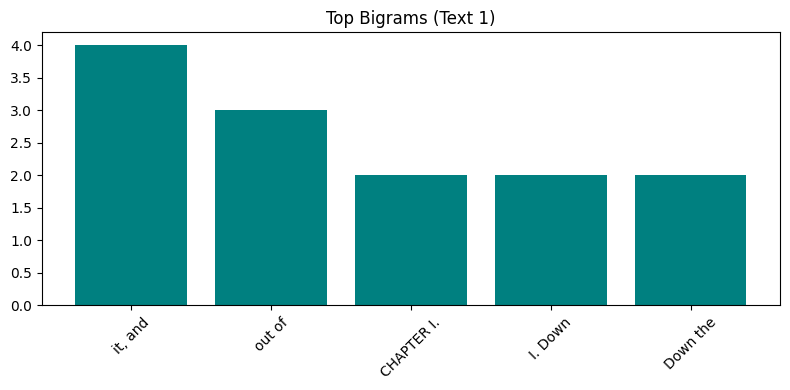

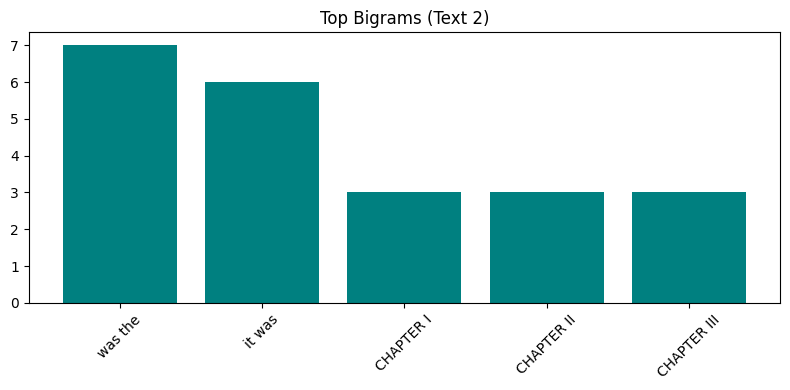

In [ ]:
#Bigram Visualization
#Visualize Bigram Frequencies
def plot_bigrams(bigrams, title="Top Bigrams"):
    """Plot top bigrams."""
    if bigrams:
        labels, counts = zip(*bigrams)
        plt.figure(figsize=(8, 4))
        plt.bar(labels, counts, color='teal')
        plt.title(title, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

for key, data in loaded_texts.items():
    bigrams = analyze_bigrams(data['text'])
    plot_bigrams(bigrams, title=f"Top Bigrams ({key})")